### NLP Natural Disaster tweet classifier

<div size=50% ><b><i>Lorenzo Reinoso Fuentes   --     mail: loloreinoso03@gmail.com</b><i></div>                   
<div size=50%>0212511 UP</div>

In [57]:
# dependencies, all files and libraries needes to run the proyect Python
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import seaborn as sns

df_Original =  pd.read_csv("tweet_disaster.csv")
df = df_Original[['text','target']].copy()
df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [58]:
# Check if there are empty values
df.isnull().sum()
# as there are no empty values we can skip this step

text      0
target    0
dtype: int64

In [59]:
def pre_processing(texto):
    resultado = texto.lower()
    lemmatizer = WordNetLemmatizer()
    stop_words_en = stopwords.words("English")
    stop_words_en.append("u")
    resultado = re.sub(r"(@[A-Za-z0-9_]+)|((https?:\/\/)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*))|([^A-Za-z0-9 \-\t])|(&amp)|(amp)", "", resultado)
    resultado = re.sub(r"(\s\s\s)|(\s\s)|(\-)|(\t)", " ", resultado) 
    resultado = word_tokenize(resultado)
    resultado = [lemmatizer.lemmatize(word) for word in resultado]
    # extra words to remove
    stop_words_en.append("im")
    stop_words_en.append("wa")
    resultado = [token for token in resultado if token not in stop_words_en]
    resultado = " ".join(resultado)

    return resultado

In [60]:
# Mapp 1 to "real disaster" and 0 to "not-real disaster"
mapper = {
    1:"real disaster",
    0:"not-real disaster"
}
df["target"] = df["target"].map(mapper)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,real disaster
1,Forest fire near La Ronge Sask. Canada,real disaster
2,All residents asked to 'shelter in place' are ...,real disaster
3,"13,000 people receive #wildfires evacuation or...",real disaster
4,Just got sent this photo from Ruby #Alaska as ...,real disaster


In [61]:
# Create a new column with the pre_processed text 
df["clean_text"] = df["text"].apply(pre_processing)

In [62]:
# Word cloud code for Real values and not Real ones, the code can be adapted to fit a desired IMG, and it can be adjusted fro the colors and the size of the strings(nmgrams)
def Word_cloud_doble(df,image, n_gram = 1, estilo = "viridis"):
    cloud_T = "".join(df[df["target"]=="real disaster"]["clean_text"])
    cloud_F = "".join( df[df["target"]=="not-real disaster"]["clean_text"])
    mask = np.array(Image.open(image))
    def generate_wordcloud(cloud_text, title, position):
        vocab = []
        for ngram in ngrams(word_tokenize(cloud_text), n_gram):
            resultado = " ".join(ngram)
            vocab.append(resultado)
        result_word = dict(pd.Series(vocab).value_counts())

        wordcloud = WordCloud(
            width=600,
            height=600,
            colormap=estilo,
            background_color="black",
            mask=mask,
            min_font_size=6
        ).generate_from_frequencies(result_word)

        plt.subplot(1, 2, position)
        plt.imshow(wordcloud)
        plt.title(title, fontsize=16)
        plt.axis("off")

    plt.figure(figsize=(12, 6))
    generate_wordcloud(cloud_T, "real disaster", 1)
    generate_wordcloud(cloud_F, "Not-real disaster", 2)

    plt.tight_layout()
    plt.show()

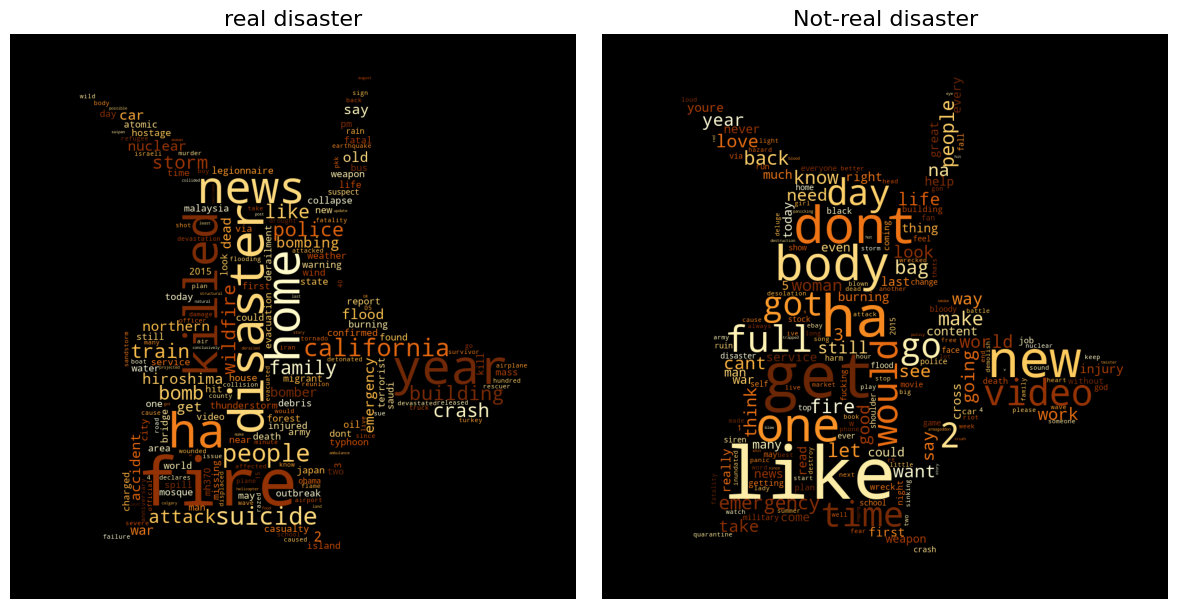

In [63]:
# unigrams: these are single words that repeat across the text ()
Word_cloud_doble(df,"disaster.jpeg",1,"YlOrBr")

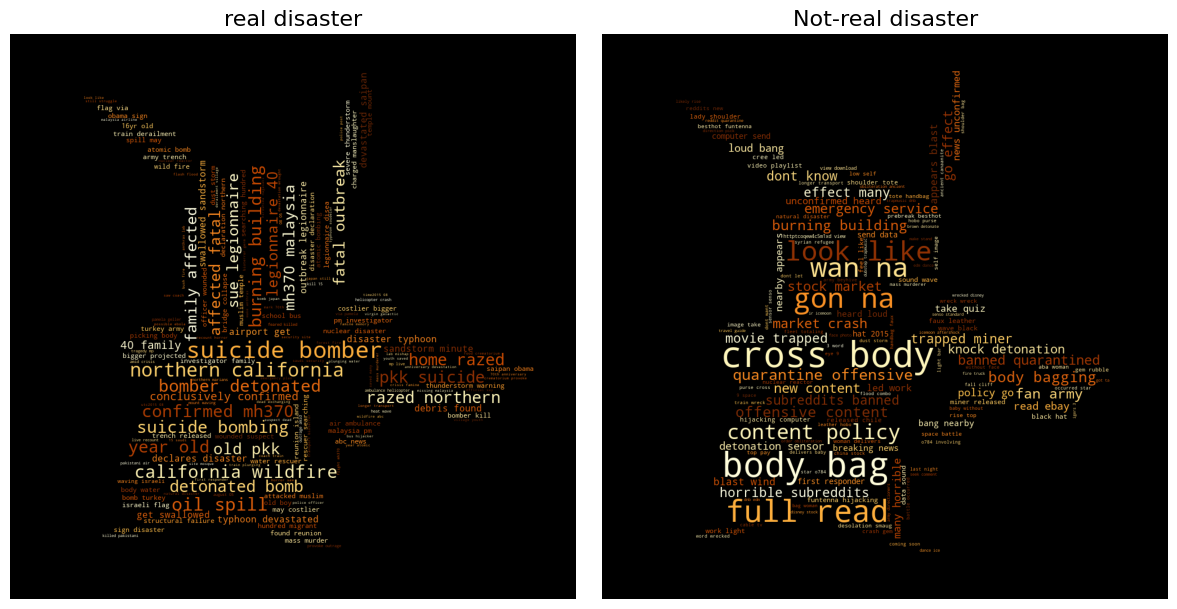

In [64]:
# Bigrams:two word sentences, that repeat across the texts
Word_cloud_doble(df,"disaster.jpeg",2,"YlOrBr")

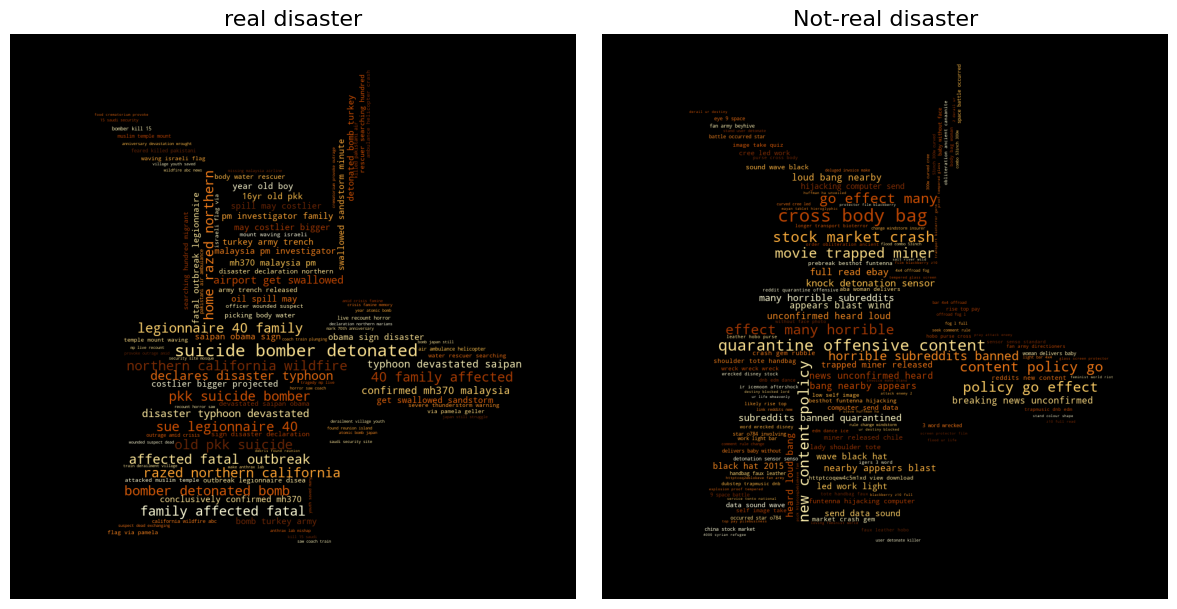

In [65]:
# Trigrams: three word sentences that repeat across the texts
Word_cloud_doble(df,"disaster.jpeg",3,"YlOrBr")

In [66]:
# Bar graph code, this code creates a bar graph with 15 of the most repeated ngrams(size of sentences)
import warnings # this is important because there are "errors" that mess with the aesthetic of the file.
warnings.filterwarnings("ignore", "is_categorical_dtype")
def Word_bar_graph_doble(df, n_gram = 1):
    Bar_T = "".join(df[df["target"]=="real disaster"]["clean_text"])
    Bar_F = "".join( df[df["target"]=="not-real disaster"]["clean_text"])
    def generate_bargraph(bar_text, title, position,n_gram):
        vocab = []
        for ngram in ngrams(word_tokenize(bar_text), n_gram):
            resultado = " ".join(ngram)
            vocab.append(resultado)
        result_dic = dict(pd.Series(vocab).value_counts())
        my_df = pd.DataFrame(result_dic.items()).head(15)
        plt.subplot(1, 2, position)
        ax = sns.barplot(x=0, y=1, data=my_df,palette="rocket")
        ax.set(xlabel = 'Tweets - #times it shows', title=title)
        plt.xticks(rotation=90) # important in order to really sea the senteces, if removed they merge and its impossible to read them.

    plt.figure(figsize=(12, 6))
    generate_bargraph(Bar_T, "Real disaster", 1,n_gram)
    generate_bargraph(Bar_F, "Not-real disaster", 2,n_gram)

    plt.tight_layout()
    plt.show()

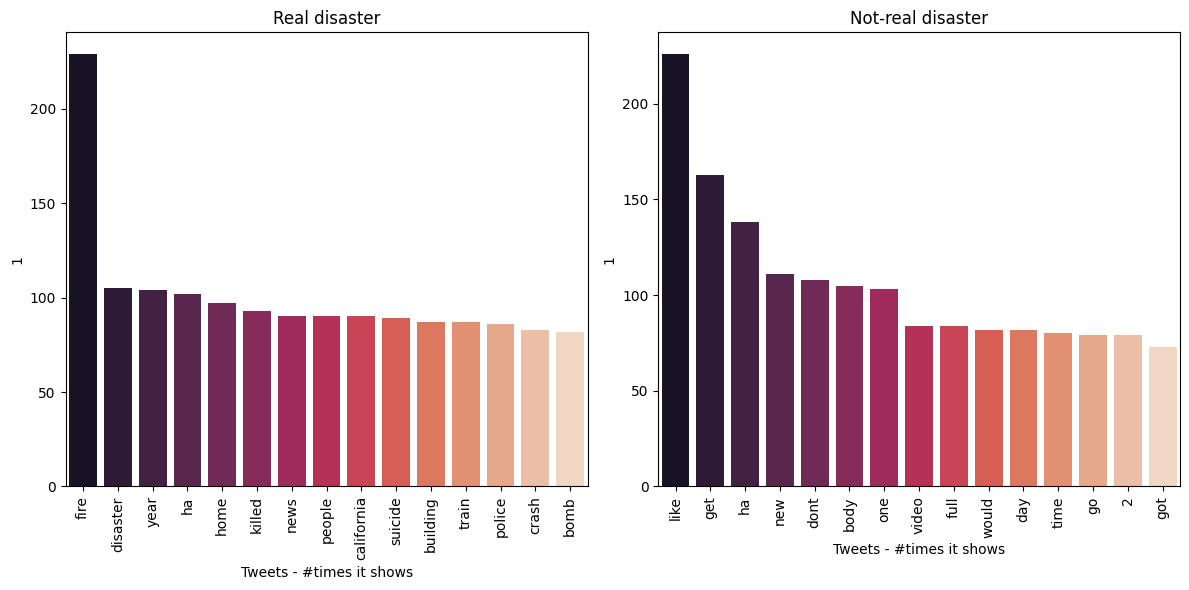

In [67]:
# unigrams: these are single words that repeat across the text ()
Word_bar_graph_doble(df,1)

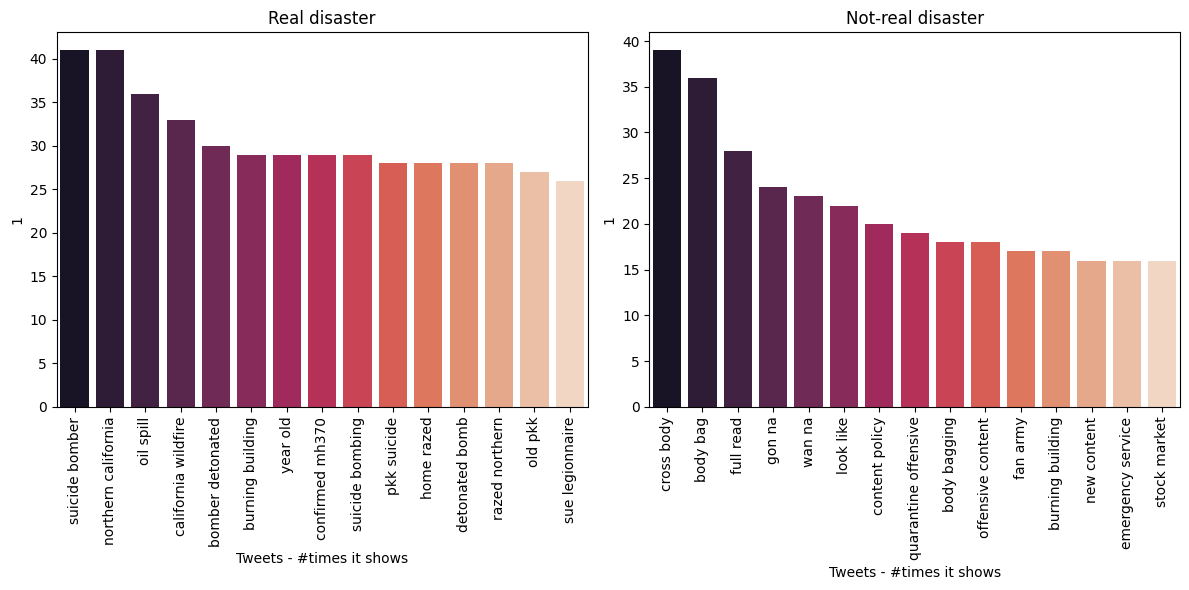

In [68]:
# Bigrams:two word sentences, that repeat across the texts
Word_bar_graph_doble(df,2)

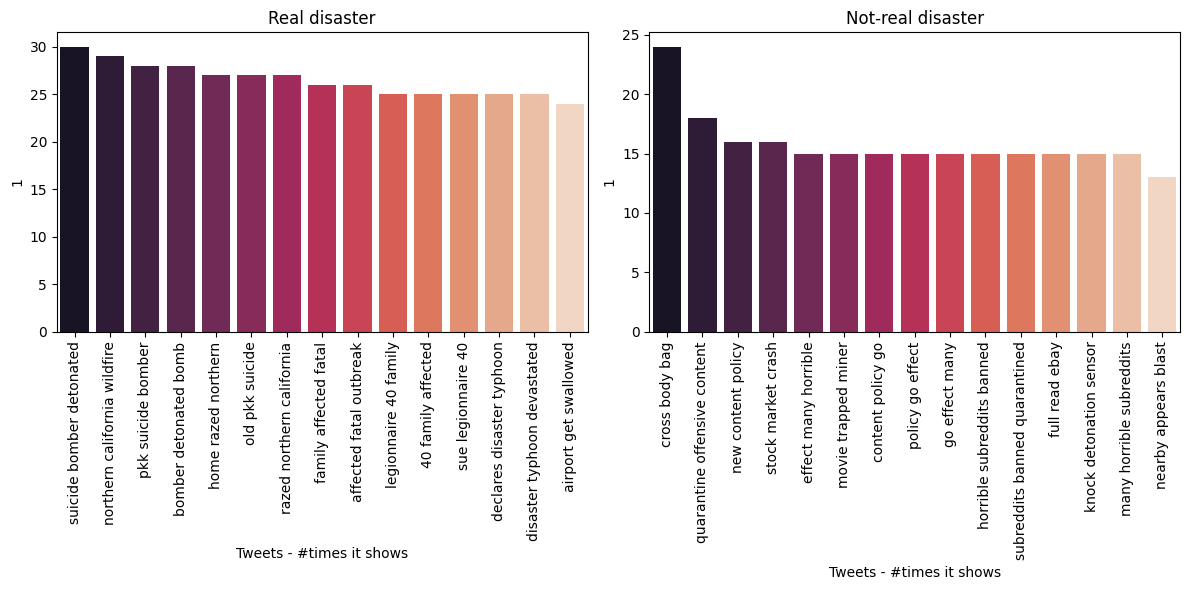

In [69]:
# Trigrams: three word sentences that repeat across the texts
Word_bar_graph_doble(df,3)

In [70]:
# load the embedings (vector size 300). Glove MIT Standard.
embeddings = {}

with open("/Users/lorenzoreinoso/Documents/Files/glove.6B.300d.txt", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:])
        embeddings[word] = vectors

In [71]:
# Ask us to remove hashtags (i didnot do it previusly), and creates  the vectorized "reference" to a word if exist.
def vectorize(text):
    stop_words_en = stopwords.words("english")
    lemmatizer = WordNetLemmatizer()
    vector_size = 300
    texto = text.lower()
    texto = re.sub(r"(@[A-Za-z0-9_]+)|((https?:\/\/)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*))|(\#\w*)|(([^A-Za-z0-9 \-\t]))",'',texto)
    texto = re.sub(r"(\s\s\s)|(\s\s)|(\-)|(\t)", " ", texto)  # remove extra spaces
    texto = word_tokenize(texto)
    texto = [palabra for palabra in texto if palabra not in stop_words_en]
    texto = [lemmatizer.lemmatize(palabra)for palabra in texto]
    vector = np.zeros(vector_size)
    for palabra in texto:
        if palabra in embeddings:
            vector = vector + embeddings[palabra].astype('float')
        else:
            print(f"No hay un embedding para la palabra {palabra}. Omitiendo...")
    vector = vector.reshape(1,-1)[0]
    return vector

In [72]:
# apply the vectorize funcion to our data set creating a new column
df["vector"] = df["text"].apply(vectorize)
df.head()

No hay un embedding para la palabra fvck. Omitiendo...
No hay un embedding para la palabra goooooooaaaaaal. Omitiendo...
No hay un embedding para la palabra looooool. Omitiendo...
No hay un embedding para la palabra wayi. Omitiendo...
No hay un embedding para la palabra cooool. Omitiendo...
No hay un embedding para la palabra httptcolhyxeohy6c. Omitiendo...
No hay un embedding para la palabra httptcoyao1e0xngw. Omitiendo...
No hay un embedding para la palabra newsnigeria. Omitiendo...
No hay un embedding para la palabra httptco2nndbgwyei. Omitiendo...
No hay un embedding para la palabra httptcoqqsmshaj3n. Omitiendo...
No hay un embedding para la palabra theyve. Omitiendo...
No hay un embedding para la palabra httptco3imaomknna. Omitiendo...
No hay un embedding para la palabra superintende. Omitiendo...
No hay un embedding para la palabra httptcowdueaj8q4j. Omitiendo...
No hay un embedding para la palabra httptcoroi2nsmejj. Omitiendo...
No hay un embedding para la palabra httptco3tj8zji

,text,target,clean_text,vector
0,Our Deeds are the Reason of this #earthquake M...,real disaster,deed reason earthquake may allah forgive,"[-0.2553592, -1.2721859999999998, -0.722288, -..."
1,Forest fire near La Ronge Sask. Canada,real disaster,forest fire near la ronge sask canada,"[-0.34639000000000003, 0.42318300000000003, -0..."
2,All residents asked to 'shelter in place' are ...,real disaster,resident asked shelter place notified officer ...,"[-1.4287290000000001, -1.3780747999999998, -1...."
3,"13,000 people receive #wildfires evacuation or...",real disaster,13000 people receive wildfire evacuation order...,"[-0.058216000000000045, -0.148002, -0.33548199..."
4,Just got sent this photo from Ruby #Alaska as ...,real disaster,got sent photo ruby alaska smoke wildfire pour...,"[-2.199208, -0.18852500000000003, -0.207740000..."


In [73]:
# Creates a TSNE model with two dimensions that allow us to visualize the values
    # color - Category or target
    # and the hover data(or displayed info) is the original Text
from sklearn.manifold import TSNE
import plotly_express as px

X = df["vector"]
X = np.concatenate(X,axis=0).reshape(-1,300)
modelo = TSNE(n_components=2)
resultado = modelo.fit_transform(X)
df["tsne_1"]=resultado[:,0]
df["tsne_2"]=resultado[:,1]
fig = px.scatter(data_frame=df,
                 x=df["tsne_1"],
                 y=df["tsne_2"],
                 template="plotly_dark",
                 hover_data=["text"],
                 color=df["target"])
fig.show()

In [74]:
# Pipe line of classidication in orfer to make a prediction
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
# We need to get the data, the training values ande the test values
X = df['vector']
X = np.concatenate(X,axis = 0).reshape(-1,300)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=101)
# Our Classification models
rf_classifier = RandomForestClassifier()
svc_classifier = SVC()

# Our parameters, at least two for each "adaptation of the model"
param_grid_rf = {
    'n_estimators': [20,50, 100],
    'criterion': ["gini", "entropy"]
}

param_grid_svc = {
    "C": [.1,.5,1],
    "kernel": ["linear", "rbf"]
}

# Use of Grid search to "apply" the paragrams, the model, the n_jobs and to use accuracy as scoring method.
grid_search_rf = GridSearchCV(
    estimator=rf_classifier, 
    param_grid=param_grid_rf, 
    cv=5, 
    scoring="accuracy", 
    n_jobs=-1, 
    verbose=3
)

grid_search_svc = GridSearchCV(
    estimator=svc_classifier, 
    param_grid=param_grid_svc, 
    cv=5, 
    scoring="accuracy", 
    n_jobs=-1, 
    verbose=3
)

# Adjunt the Grid Search to our data
grid_search_rf.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros y puntajes para ambos modelos
print("Mejores hiperparámetros para Random Forest:")
print(grid_search_rf.best_params_)
print("Mejor puntaje para Random Forest:")
print(grid_search_rf.best_score_)

print("Mejores hiperparámetros para SVC:")
print(grid_search_svc.best_params_)
print("Mejor puntaje para SVC:")
print(grid_search_svc.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 2/5] END ...criterion=gini, n_estimators=20;, score=0.745 total time=   1.4s
[CV 5/5] END ...criterion=gini, n_estimators=20;, score=0.796 total time=   1.4s
[CV 3/5] END ...criterion=gini, n_estimators=20;, score=0.761 total time=   1.5s
[CV 1/5] END ...criterion=gini, n_estimators=20;, score=0.778 total time=   1.4s
[CV 4/5] END ...criterion=gini, n_estimators=20;, score=0.777 total time=   1.5s
[CV 1/5] END ...criterion=gini, n_estimators=50;, score=0.785 total time=   3.5s
[CV 3/5] END ...criterion=gini, n_estimators=50;, score=0.782 total time=   3.5s
[CV 2/5] END ...criterion=gini, n_estimators=50;, score=0.762 total time=   3.9s
[CV 4/5] END ...criterion=gini, n_estimators=50;, score=0.790 total time=   3.5s
[CV 5/5] END ...criterion=gini, n_estimators=50;, score=0.788 total time=   3.6s
[CV 1/5] END criterion=entropy, n_estimators=20;, score=0.779 total time=   1.4s
[CV 2/5] END criterion=entropy, n_estimators=20;,

In [75]:
if(grid_search_rf.best_score_ > grid_search_rf.best_score_): 
    model = grid_search_rf.best_estimator_
else:
    model = grid_search_svc.best_estimator_
def Nat_disaster_evaluator(Noticia, show_preprocess=False):
    resultado = pre_processing(Noticia)
    if show_preprocess:
        print(resultado)
    resultado= vectorize(resultado).reshape(-1,300)
    prediccion = model.predict(resultado)
    print("The introduced text probably is: "+ prediccion)

In [76]:
Nat_disaster_evaluator("There is a flood in tijuana Mexico",True)

flood tijuana mexico
['The introduced text probably is: real disaster']


In [77]:
Nat_disaster_evaluator("tsunami hits japan ",True)

tsunami hit japan
['The introduced text probably is: real disaster']


In [78]:
Nat_disaster_evaluator("bleeding may cause death",True)

bleeding may cause death
['The introduced text probably is: not-real disaster']


In [79]:
# Search engine, which search a phrase, and uses cos similitude in otder to compute the values of the frase, x value allows you to "limit" the search to only a few(x) texts
warnings.simplefilter("ignore", category=RuntimeWarning)

def getTopXDocs(frase,x,export = False):
    data = {
        "text":[],
        "sims":[],
    }
    buscar = vectorize(frase)
    for vector, headline in zip(df["vector"],df["text"]):
        data["text"].append(headline)
        A = buscar
        B = vector
        resultado = np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
        data["sims"].append(resultado)
    final = pd.DataFrame(data).sort_values(by="sims", ascending=False).head(x)
    if export==True:
        final.to_csv("topDocs.cvs",index=False)
    return(final)

In [80]:
getTopXDocs("Forest fire",10)

,text,sims
4035,We are having forest fires out here in #socal ...,0.934249
4028,@hornybigbadwolf -sets the forest on fire-,0.931881
4039,Only you can prevent forest fires. ???? http:/...,0.923654
4024,Our little forest fire wardens http://t.co/aPr...,0.871601
4031,IT STARTS A FOREST FIRE THAT CANNOT BE PUT OUT...,0.861545
3742,@Miss_HoMaStToPa cause were on fire we are on ...,0.810020
4061,' no pharrell only YOU can prevent forest fir...,0.802717
4036,U.S. Forest Service firefighter David Ruhl 38 ...,0.763833
4025,Fire in Pisgah National Forest grows to 375 ac...,0.751702
4032,Fire in Pisgah National Forest grows to 375 ac...,0.751702


In [81]:
getTopXDocs("if you get cut it will make you bleed",4)

,text,sims
2792,I want to go back to Vegas for my 21 but I fee...,0.788217
428,who makes these? http://t.co/28t3NWHdKy,0.784811
856,We gone get it get it in blood,0.776602
652,My hair is poverty at the moment need to get a...,0.768767
